In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:540: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:545: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


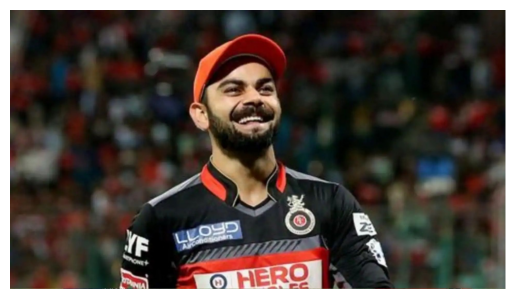

Caption 1: A close up of a man with a beard wearing a red hat
Caption 2: A close up of a man with a beard wearing a red cap
Caption 3: A close up of a man with a beard wearing a hat


In [8]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch
import os
import matplotlib.pyplot as plt

# Load the processor and the model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")

# Specify the path to your image
image_path =  "/content/virat.jpg"

# Check if the image exists
if not os.path.exists(image_path):
    print(f"Error: The image at {image_path} does not exist.")
else:
    # Load the image
    image = Image.open(image_path)

    # Preprocess the image
    inputs = processor(images=image, return_tensors="pt")

    # Generate captions with adjusted parameters
    outputs = model.generate(
        **inputs,
        max_length=60,         # Increased max_length for longer captions
        num_beams=10,          # Increased num_beams for better quality
        num_return_sequences=3,
        temperature=0.7,       # Adjust temperature for more diverse outputs
        top_p=0.9              # Use nucleus sampling
    )

    # Decode the generated captions
    captions = [processor.decode(output, skip_special_tokens=True) for output in outputs]

    # Post-process captions (e.g., capitalize first letter)
    captions = [caption.capitalize() for caption in captions]

    # Display the image and captions
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    for i, caption in enumerate(captions):
        print(f"Caption {i + 1}: {caption}")